# **Mobile Phone Sales Deep Analysis**

## **Problem Statement:**

The company is in a competitive mobile phone market and seeks to gain a competitive edge by optimizing its sales strategy. The main challenge is to understand the key factors driving sales and profitability, as well as customer preferences, in order to increase market share and customer satisfaction.

## **Goal:**

The goal is to analyze the mobile sales data to extract actionable insights that can help the company:
1.   Identify the most profitable mobile models and brands.
2.   Understand the demographics of customers who are contributing the most to sales.
3.   Determine the most effective sales channels and payment methods.
4.   Develop strategies to enhance sales performance in underperforming segments.

## **Objectives:**

- **Revenue Maximization**: Identify which products and customer segments generate the highest revenue and find opportunities to upsell or cross-sell.
- **Customer Segmentation**: Understand customer demographics and preferences to tailor marketing strategies accordingly.
- **Sales Channel Optimization**: Evaluate the effectiveness of different sales channels and payment methods.
- **Brand Performance Analysis**: Assess the performance of different brands to guide inventory and marketing focus.
- **Strategic Recommendations**: Provide data-driven recommendations to stakeholders to help them make informed decisions about product offerings, pricing strategies, and marketing campaigns.

## **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

## **Basic Understanding of The Data**

In [2]:
# Import df & show sample

df = pd.read_csv('/content/mobile_sales.csv')
df.sample(5)

,TransactionID,Date,MobileModel,Brand,Price,UnitsSold,TotalRevenue,CustomerAge,CustomerGender,Location,PaymentMethod
971,381d1e2b-f1be-4163-bbe1-97b02725d239,2024-04-27,hundred,Martinez PLC,240.38,25,78661.52,55,Other,Joshuaberg,Debit Card
562,0e28407f-34eb-470b-b786-5688a42daa31,2024-01-01,within,Tran-Graham,1415.83,39,96500.60,30,Other,Medinaland,Debit Card
621,69dcedc9-84c1-4736-9a47-cdcc1adfde86,2024-05-02,forget,Cobb LLC,410.05,90,53107.15,24,Other,West Kathrynfurt,Credit Card
217,99ea4ef2-dca1-42ce-9d65-99314b4bc2a2,2024-06-10,Democrat,Martin Group,627.75,78,19068.80,51,Male,South Leslie,Online
987,78570e53-00a1-4890-94bf-ded05ed52867,2024-01-22,prepare,Horne PLC,1076.75,60,4879.19,64,Other,Port Juan,Debit Card


## **Data Exploration**

In [3]:
# Show df Info

list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_item, columns='Feature,df Type,Null, Null (%),Unique,Unique Sample'.split(","))
desc_df

,Feature,df Type,Null,Null (%),Unique,Unique Sample
0,TransactionID,object,0,0.0,1000,"[79397f68-61ed-4ea8-bcb2-f918d4e6c05b, 4f87d11..."
1,Date,object,0,0.0,205,"[2024-01-06, 2024-04-05, 2024-02-13, 2024-04-1..."
2,MobileModel,object,0,0.0,637,"[direction, right, summer, keep, option]"
3,Brand,object,0,0.0,980,"[Green Inc, Thomas-Thompson, Sanchez-Williams,..."
4,Price,float64,0,0.0,999,"[1196.95, 1010.34, 400.8, 338.6, 839.79]"
5,UnitsSold,int64,0,0.0,99,"[85, 64, 95, 79, 41]"
6,TotalRevenue,float64,0,0.0,999,"[28002.8, 2378.82, 31322.56, 31159.75, 11523.36]"
7,CustomerAge,int64,0,0.0,47,"[32, 55, 57, 46, 38]"
8,CustomerGender,object,0,0.0,3,"[Female, Male, Other]"
9,Location,object,0,0.0,963,"[Port Erik, East Linda, East Angelicastad, Eas..."


**Missing Values**: There are no missing values in the dataset, which means the data is complete and does not require imputation or removal of rows due to missing data.

In [4]:
# Show df Rows & Features Number
print("Total Rows :", df.shape[0])
print("Total Features :", df.shape[1])

Total Rows : 1000
Total Features : 11


In [5]:
# Check duplicated value
df.duplicated().sum()

0

In [6]:
# Statistics about the data set
df.describe().style.background_gradient(cmap='bone_r')

,Price,UnitsSold,TotalRevenue,CustomerAge
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,807.512970,50.074000,40218.445040,41.141000
std,402.489878,28.616804,32715.290358,13.528346
min,103.320000,1.000000,116.850000,18.000000
25%,458.037500,25.000000,13316.037500,29.000000
50%,823.730000,51.000000,30860.655000,41.000000
75%,1157.875000,75.000000,60770.435000,53.000000
max,1499.250000,99.000000,141411.840000,64.000000


## **Feature Engineering**

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
# 1. Date Features
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

In [9]:
# 2. Revenue Per Unit
df['RevenuePerUnit'] = df['TotalRevenue'] / df['UnitsSold']

In [10]:
# 3. Customer Age Groups
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64']
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=bins, labels=labels, right=False)

In [11]:
# 5. Creating a combined feature for Location and Payment Method
df['LocationPayment'] = df['Location'] + '_' + df['PaymentMethod']

In [12]:
df.head()

,TransactionID,Date,MobileModel,Brand,Price,UnitsSold,TotalRevenue,CustomerAge,CustomerGender,Location,PaymentMethod,Month,DayOfWeek,IsWeekend,RevenuePerUnit,AgeGroup,LocationPayment
0,79397f68-61ed-4ea8-bcb2-f918d4e6c05b,2024-01-06,direction,Green Inc,1196.95,85,28002.80,32,Female,Port Erik,Online,1,5,1,329.444706,25-34,Port Erik_Online
1,4f87d114-f522-4ead-93e3-f336402df6aa,2024-04-05,right,Thomas-Thompson,1010.34,64,2378.82,55,Female,East Linda,Credit Card,4,4,0,37.169063,55-64,East Linda_Credit Card
2,6750b7d6-dcc5-48c5-a76a-b6fc9d540fe1,2024-02-13,summer,Sanchez-Williams,400.80,95,31322.56,57,Male,East Angelicastad,Online,2,1,0,329.711158,55-64,East Angelicastad_Online
3,7da7de95-f772-4cc2-bce0-b0873f98233e,2024-04-17,keep,Greer and Sons,338.60,79,31159.75,46,Other,East Kevin,Cash,4,2,0,394.427215,45-54,East Kevin_Cash
4,469044af-0d60-4d87-af66-c6603e844057,2024-06-02,option,Brown and Sons,839.79,41,11523.36,38,Male,New Lindaborough,Online,6,6,1,281.057561,35-44,New Lindaborough_Online


## **Data Validation**

In [13]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).sum()
outliers

,0
Price,0
UnitsSold,0
TotalRevenue,6
CustomerAge,0
IsWeekend,0
RevenuePerUnit,102


**Outliers**:

- **TotalRevenue**: There are 6 outliers in the TotalRevenue column.
- **RevenuePerUni**t: There are 102 outliers in the RevenuePerUnit column.

In [14]:
# Define the capping thresholds
Q1_total_revenue = df['TotalRevenue'].quantile(0.25)
Q3_total_revenue = df['TotalRevenue'].quantile(0.75)
IQR_total_revenue = Q3_total_revenue - Q1_total_revenue
lower_bound_total_revenue = Q1_total_revenue - 1.5 * IQR_total_revenue
upper_bound_total_revenue = Q3_total_revenue + 1.5 * IQR_total_revenue

Q1_revenue_per_unit = df['RevenuePerUnit'].quantile(0.25)
Q3_revenue_per_unit = df['RevenuePerUnit'].quantile(0.75)
IQR_revenue_per_unit = Q3_revenue_per_unit - Q1_revenue_per_unit
lower_bound_revenue_per_unit = Q1_revenue_per_unit - 1.5 * IQR_revenue_per_unit
upper_bound_revenue_per_unit = Q3_revenue_per_unit + 1.5 * IQR_revenue_per_unit

# Capping the outliers
df['TotalRevenue'] = df['TotalRevenue'].clip(lower=lower_bound_total_revenue, upper=upper_bound_total_revenue)
df['RevenuePerUnit'] = df['RevenuePerUnit'].clip(lower=lower_bound_revenue_per_unit, upper=upper_bound_revenue_per_unit)

# Verify that the outliers have been addressed
outliers_after_capping = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).sum()
outliers_after_capping

,0
Price,0
UnitsSold,0
TotalRevenue,0
CustomerAge,0
IsWeekend,0
RevenuePerUnit,0


## **Revenue Maximization**

### **1: Total Revenue by Top 10 Mobile Models**

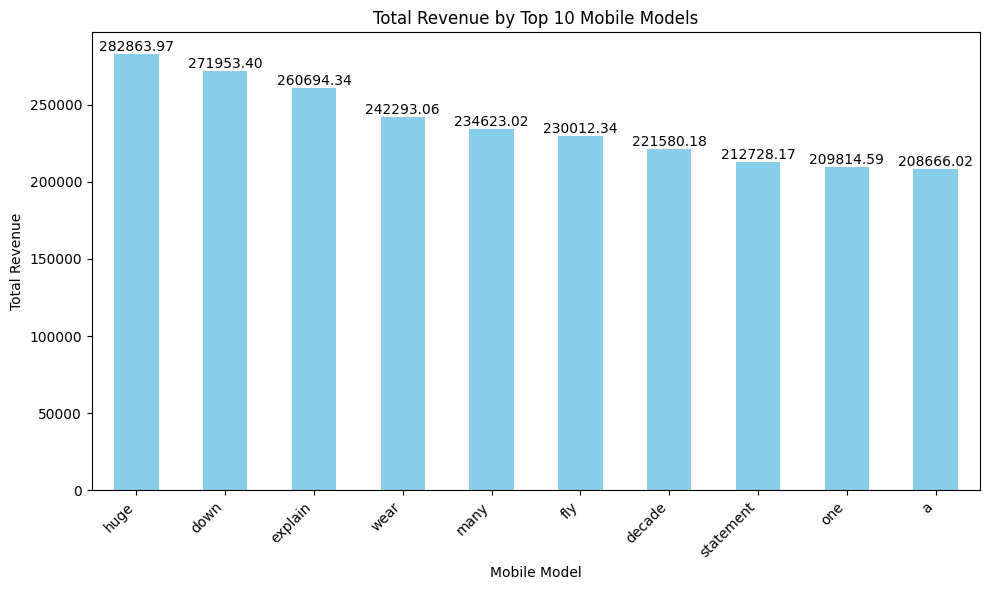

In [15]:
plt.figure(figsize=(10, 6))
top_10_models = df.groupby('MobileModel')['TotalRevenue'].sum().sort_values(ascending=False).head(10)
top_10_models.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Top 10 Mobile Models')
plt.xlabel('Mobile Model')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')

for index, value in enumerate(top_10_models):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### **2: Total Revenue by Top 10 Brands**

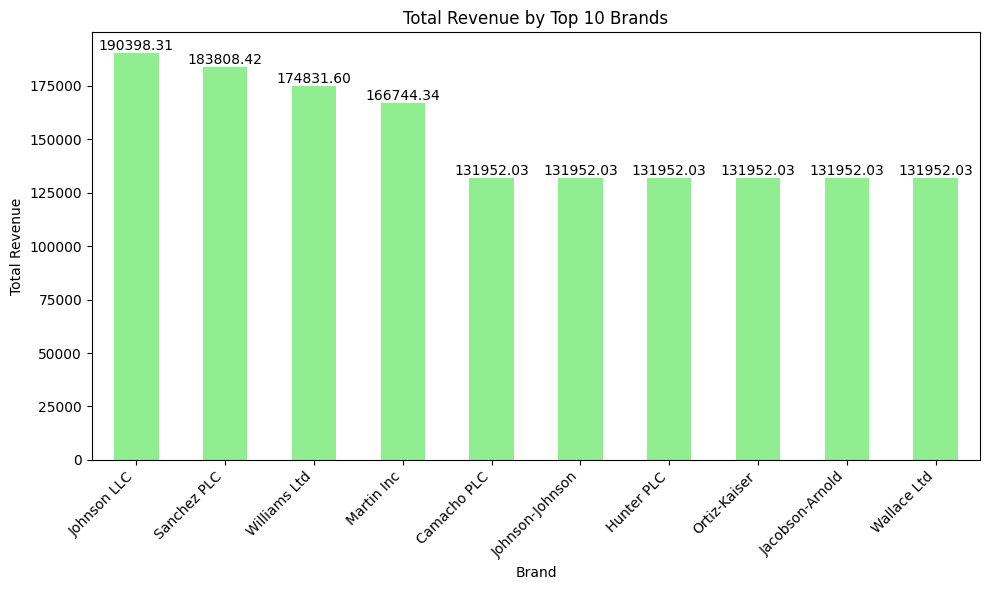

In [16]:
plt.figure(figsize=(10, 6))
top_10_brands = df.groupby('Brand')['TotalRevenue'].sum().sort_values(ascending=False).head(10)
top_10_brands.plot(kind='bar', color='lightgreen')
plt.title('Total Revenue by Top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')

# Adding data labels
for index, value in enumerate(top_10_brands):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### **3: Total Revenue by Top 10 Locations**

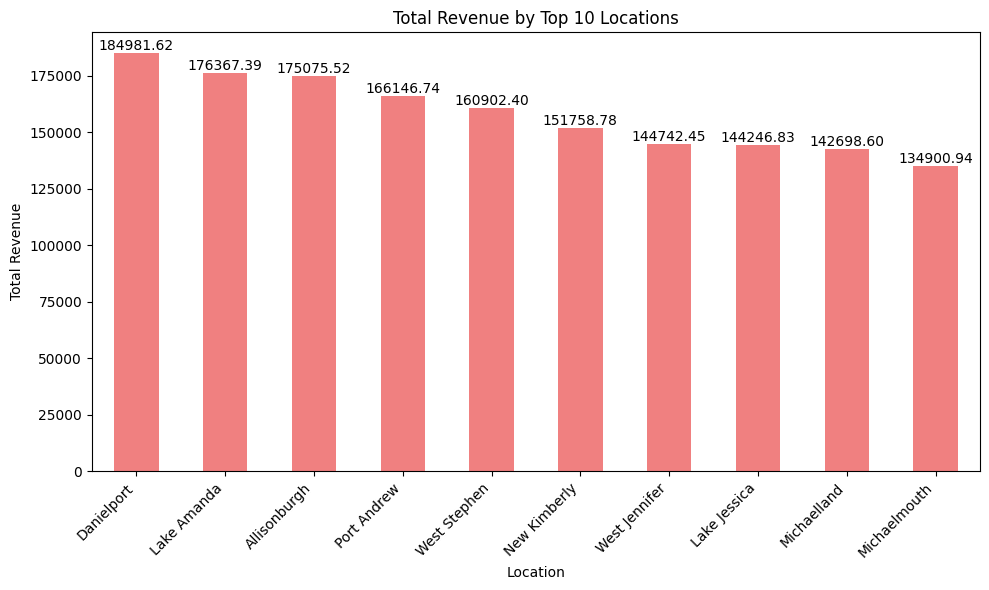

In [17]:
plt.figure(figsize=(10, 6))
top_10_locations = df.groupby('Location')['TotalRevenue'].sum().sort_values(ascending=False).head(10)
top_10_locations.plot(kind='bar', color='lightcoral')
plt.title('Total Revenue by Top 10 Locations')
plt.xlabel('Location')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')

# Adding data labels
for index, value in enumerate(top_10_locations):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## **Customer Segmentation**

### **1: Total Revenue by Customer Age Group**

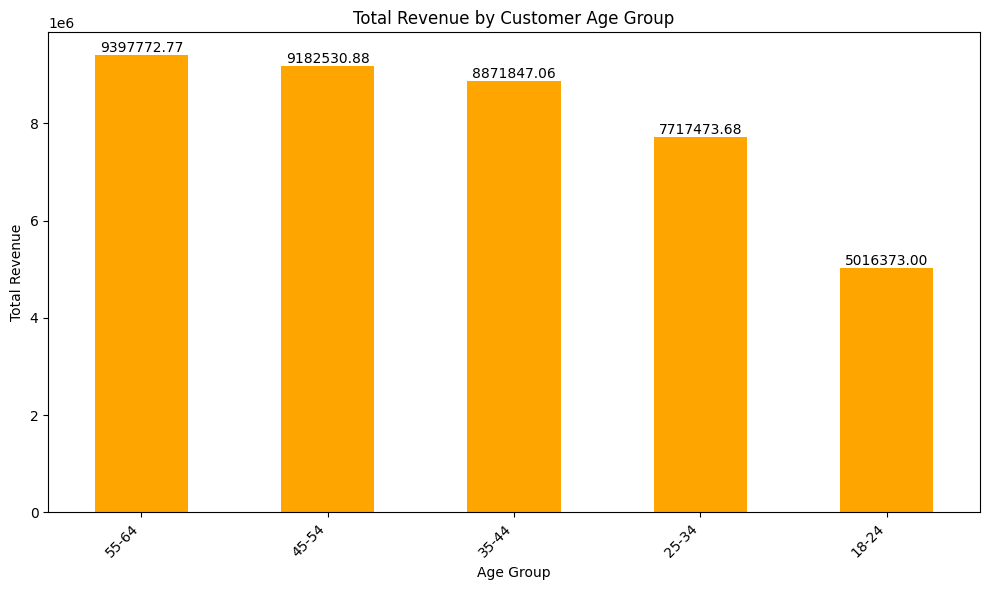

In [18]:
plt.figure(figsize=(10, 6))
age_group_revenue = df.groupby('AgeGroup')['TotalRevenue'].sum().sort_values(ascending=False)
age_group_revenue.plot(kind='bar', color='orange')
plt.title('Total Revenue by Customer Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')

# Adding data labels
for index, value in enumerate(age_group_revenue):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### **2: Total Revenue by Customer Gender**

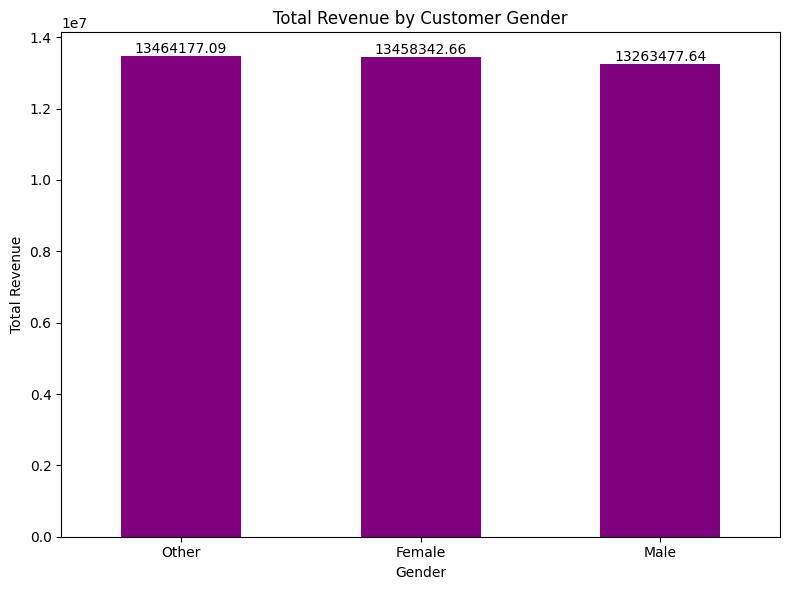

In [19]:
plt.figure(figsize=(8, 6))
gender_revenue = df.groupby('CustomerGender')['TotalRevenue'].sum().sort_values(ascending=False)
gender_revenue.plot(kind='bar', color='purple')
plt.title('Total Revenue by Customer Gender')
plt.xlabel('Gender')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0, ha='center')

# Adding data labels
for index, value in enumerate(gender_revenue):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## **Sales Channel Optimization**

### **1: Total Revenue by Payment Method with Data Labels**

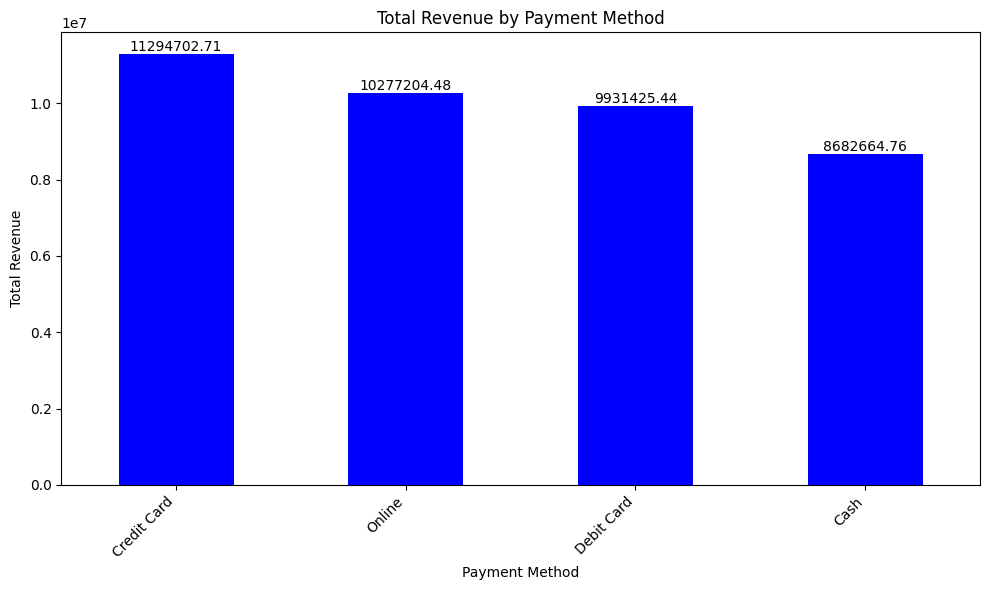

In [20]:
plt.figure(figsize=(10, 6))
payment_method_revenue = df.groupby('PaymentMethod')['TotalRevenue'].sum().sort_values(ascending=False)
payment_method_revenue.plot(kind='bar', color='blue')
plt.title('Total Revenue by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')

# Adding data labels
for index, value in enumerate(payment_method_revenue):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### **2: Total Revenue by Sales Channel (Location + Payment Method)**

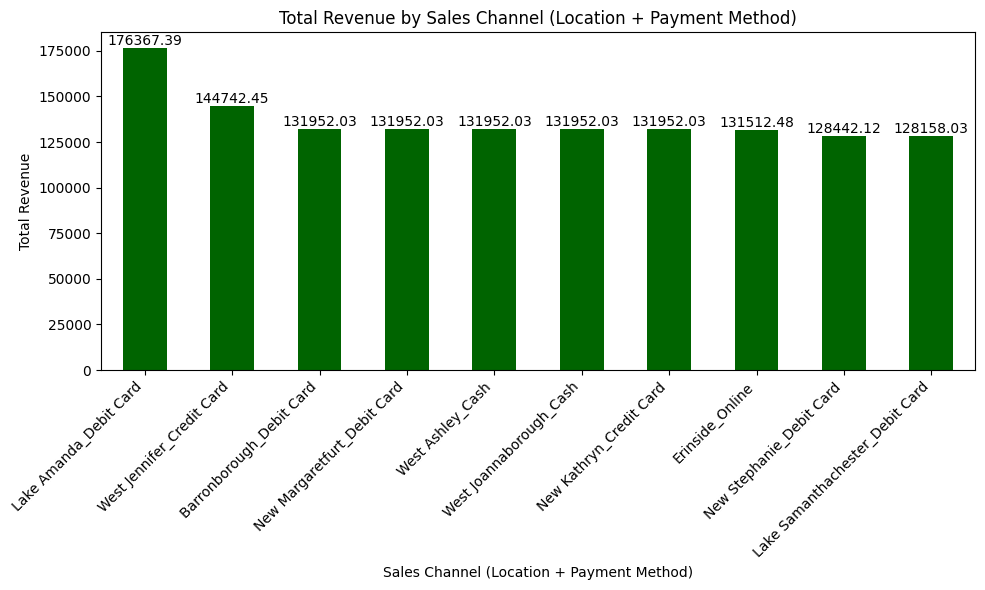

In [21]:
plt.figure(figsize=(10, 6))
location_payment_revenue = df.groupby('LocationPayment')['TotalRevenue'].sum().sort_values(ascending=False).head(10)
location_payment_revenue.plot(kind='bar', color='darkgreen')
plt.title('Total Revenue by Sales Channel (Location + Payment Method)')
plt.xlabel('Sales Channel (Location + Payment Method)')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')

# Adding data labels
for index, value in enumerate(location_payment_revenue):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## **Brand Performance Analysis**

### **1: Units Sold by Brand**

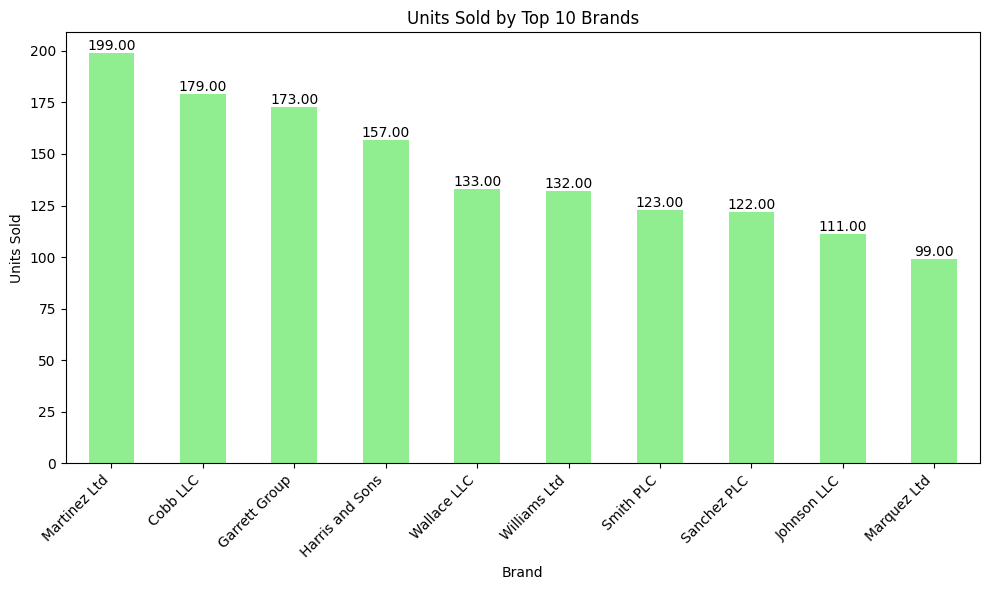

In [22]:
plt.figure(figsize=(10, 6))
brand_units_sold = df.groupby('Brand')['UnitsSold'].sum().sort_values(ascending=False).head(10)
brand_units_sold.plot(kind='bar', color='lightgreen')
plt.title('Units Sold by Top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Units Sold')
plt.xticks(rotation=45, ha='right')

# Adding data labels
for index, value in enumerate(brand_units_sold):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### **2: Revenue Per Unit by Brand**

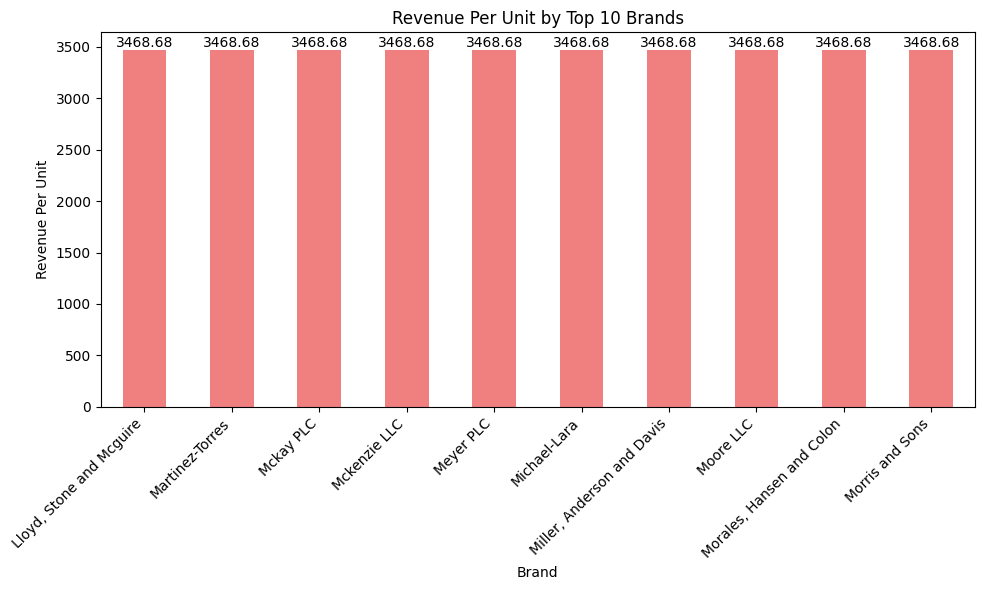

In [23]:
plt.figure(figsize=(10, 6))
brand_revenue_per_unit = df.groupby('Brand')['RevenuePerUnit'].mean().sort_values(ascending=False).head(10)
brand_revenue_per_unit.plot(kind='bar', color='lightcoral')
plt.title('Revenue Per Unit by Top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Revenue Per Unit')
plt.xticks(rotation=45, ha='right')

# Adding data labels
for index, value in enumerate(brand_revenue_per_unit):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## **Summary and Recommendations**

### 1. **Revenue Maximization**
   - **Top Performing Mobile Models and Brands**: The analysis identified specific mobile models and brands that are generating the highest revenue. These top performers should be the focus of promotional efforts to maximize sales and profit margins.
   - **Recommendation**: Increase inventory and marketing spend on the top 10 mobile models and brands. Consider bundling accessories or offering discounts on these models to further boost sales.

### 2. **Customer Segmentation**
   - **Age Group Insights**: The analysis revealed that the 55-64 and 45-54 age groups are the most significant contributors to revenue. These older demographics are crucial for driving sales.
   - **City Location Performance**: Certain cities are driving a larger portion of the revenue. These cities represent key markets that should be prioritized in marketing and sales efforts.
   - **Recommendation**: Develop targeted marketing campaigns aimed at the 45-64 age demographic, emphasizing products that cater to their preferences. Focus marketing resources on the top-performing cities, ensuring these markets are well-served with product availability and promotional activities.

### 3. **Sales Channel Optimization**
   - **Payment Methods**: Online and credit card payments are the most popular and generate the highest revenue. Cash transactions are less common but may be more prevalent in certain locations.
   - **Sales Channels**: The combination of location and payment method reveals the most effective sales channels. For example, online sales in key cities might be particularly strong.
   - **Recommendation**: Continue to optimize and promote online sales channels, particularly in the top-performing cities. Consider offering incentives for credit card payments, such as cashback or loyalty points. For less popular channels, assess if they can be improved or if resources should be reallocated.

### 4. **Brand Performance Analysis**
   - **Top Brands**: Certain brands consistently perform better in both total revenue and units sold, while others generate higher revenue per unit, indicating premium positioning.
   - **Pricing Effectiveness**: Brands with high revenue per unit are effectively capturing value through pricing, while those with high unit sales might benefit from slight price adjustments to increase overall revenue.
   - **Recommendation**: For top-selling brands, ensure consistent stock availability and consider exclusive deals or partnerships. For premium brands, maintain or enhance the luxury positioning while exploring opportunities to increase unit sales through targeted promotions.

### **Overall Strategic Recommendations**
1. **Focus on High-Performing Segments**: Allocate more resources towards the top-performing models, brands, and customer segments, particularly the 45-64 age group. This includes increasing marketing spend and inventory for high-demand products.
2. **Enhance City-Specific Strategies**: Given the importance of certain cities in driving revenue, tailor marketing strategies to these key urban markets. This might include localized promotions or events.
3. **Optimize Sales Channels**: Strengthen the most effective sales channels and consider phasing out or restructuring less effective ones. Offer targeted incentives to encourage the use of preferred payment methods.
4. **Dynamic Pricing Strategies**: Consider implementing dynamic pricing for brands with high revenue per unit to maximize profitability. Simultaneously, explore slight price adjustments for high-volume brands to boost overall revenue without impacting sales volume.
